# **Capital Bikeshare**
### 📘 Project Overview

This project utilizes the **Capital Bikeshare dataset** to explore predictive modeling using various supervised machine learning techniques. The analysis is organized into three major parts:

---

#### 1️⃣ Regression Analysis
- **Objective**: Predict the number of pickup users (`PU_ct`) and drop-off users (`DO_ct`) based on features such as temperature, humidity, wind speed, and other environmental conditions.
- **Techniques Used**: 
  - Performed **Linear Regression** to estimate relationships between variables.
  - Evaluated the model using **R-squared (R²)** and **Mean Squared Error (MSE)**.
  - Examined regression assumptions and model interpretability.

---

#### 2️⃣ Classification Analysis
- **Objective**: Convert the regression target into a classification problem by determining whether `PU_ct > DO_ct` (binary classification).
- **Models Applied**:
  - **K-Nearest Neighbors (KNN)**
  - **Logistic Regression**
  - **Linear Support Vector Classifier (Linear SVC)**
  - **Nonlinear SVC with RBF Kernel**
- **Evaluation Metric**: Classification accuracy on test data.

---

#### 3️⃣ Hyperparameter Tuning & Cross-Validation
- **Objective**: Enhance model performance and avoid overfitting by selecting optimal hyperparameters.
- **Methods Used**:
  - **GridSearchCV** and **RandomizedSearchCV** for systematic tuning.
  - **5-Fold Cross-Validation** to ensure generalizability and robustness.
- **Final Model Selection**: Based on test accuracy after tuning, ensuring a fair comparison across all models.

---

This end-to-end project demonstrates practical implementation of supervised learning, including **model training**, **tuning**, and **evaluation**, on a real-world dataset.


## Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

We deal with data from two months: 2024/03 and 2024/10.

# Gokul Kumar Kesavan

### Read data from local

In [3]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('C:\\Masters\\ML I\\Lec 2 ML\\Data\\Data\\202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('C:\\Masters\\ML I\\Lec 2 ML\\Data\\Data\\202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('C:\\Masters\\ML I\\Lec 2 ML\\Data\\Data\\202404-capitalbikeshare-tripdata.csv')

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245899 entries, 0 to 490264
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1245899 non-null  object 
 1   rideable_type       1245899 non-null  object 
 2   started_at          1245899 non-null  object 
 3   ended_at            1245899 non-null  object 
 4   start_station_name  1061748 non-null  object 
 5   start_station_id    1061748 non-null  float64
 6   end_station_name    1052421 non-null  object 
 7   end_station_id      1052253 non-null  float64
 8   start_lat           1245899 non-null  float64
 9   start_lng           1245899 non-null  float64
 10  end_lat             1244884 non-null  float64
 11  end_lng             1244884 non-null  float64
 12  member_casual       1245899 non-null  object 
dtypes: float64(6), object(7)
memory usage: 133.1+ MB


## Focus on GWSB Station: '22nd & H St NW'

### Bike Availability: Number of Pickups

In [6]:
# Convert the 'started_at' column to datetime objects
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df[df['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

started_at_date
2024-02-01    33
2024-02-02    23
2024-02-03    22
2024-02-04    18
2024-02-05    19
              ..
2024-04-26    33
2024-04-27    18
2024-04-28    36
2024-04-29    37
2024-04-30    40
Name: started_at_date, Length: 90, dtype: int64

## Dock Availability: Number of Dropoffs

In [7]:
# Convert the 'ended_at' column to datetime objects
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df[df['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

ended_at_date
2024-02-01    33
2024-02-02    25
2024-02-03    20
2024-02-04    19
2024-02-05    23
              ..
2024-04-26    39
2024-04-27    24
2024-04-28    28
2024-04-29    38
2024-04-30    39
Name: ended_at_date, Length: 90, dtype: int64

## Merge PU and DO tables
- For each day, we look at the numbers of pickups and dropoffs

In [8]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.

PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'

PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts

,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


## Visualize pickups and dropoffs

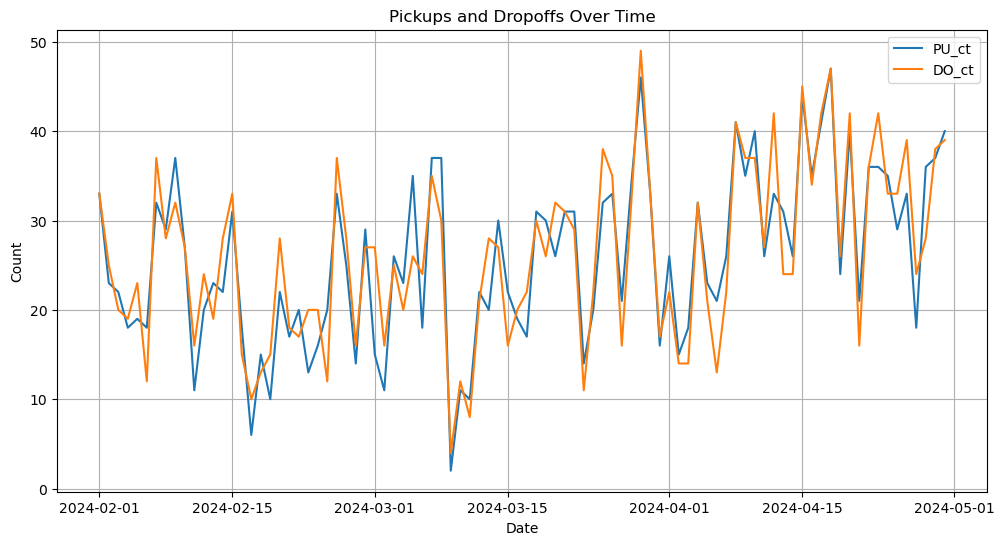

In [9]:
# plot line chart showing the PU_count and DO_count over time
import matplotlib.pyplot as plt

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(PU_DO_counts.index, PU_DO_counts['PU_ct'], label='PU_ct')
plt.plot(PU_DO_counts.index, PU_DO_counts['DO_ct'], label='DO_ct')

# Customize the chart
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Pickups and Dropoffs Over Time')
plt.legend()
plt.grid(True)

plt.show()

# Feature Information: Weather Data
- From https://www.visualcrossing.com/weather-history/

In [10]:
df_weather = pd.read_csv('C:\\Masters\\ML I\\Lec 2 ML\\Data\\Data\\DC_weather_2024.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


In [11]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        134 non-null    object 
 14  snow              366 non-null    float64
 15  snowdepth         366 non-null    float64
 16  windgust          366 non-null    float64
 1

## Drop variables of your choice

In [12]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge df_weather with PU_DO_counts

In [13]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Display the merged dataframe
merged_df

,date,PU_ct,DO_ct,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-02-01,33,33,2024-02-01,53.0,31.7,42.4,53.0,26.4,39.3,...,12.0,190.8,1016.3,43.3,8.4,136.8,11.8,5,0.73,partly-cloudy-day
1,2024-02-02,23,25,2024-02-02,51.8,44.0,47.1,51.8,36.6,44.4,...,19.1,354.3,1012.8,97.3,9.8,51.7,4.4,2,0.75,rain
2,2024-02-03,22,20,2024-02-03,51.0,35.8,42.2,51.0,28.0,37.6,...,14.7,354.9,1018.2,11.0,9.9,143.9,12.5,6,0.79,clear-day
3,2024-02-04,18,19,2024-02-04,51.2,32.7,41.7,51.2,27.4,40.7,...,9.2,87.4,1016.0,9.0,9.9,147.4,12.8,6,0.83,clear-day
4,2024-02-05,19,23,2024-02-05,51.8,32.5,41.0,51.8,26.0,37.8,...,12.2,34.9,1013.8,21.4,9.9,145.3,12.7,6,0.86,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-04-26,33,39,2024-04-26,64.9,45.5,55.2,64.9,41.5,54.2,...,15.4,116.4,1029.5,69.1,9.9,215.0,18.5,9,0.59,partly-cloudy-day
86,2024-04-27,18,24,2024-04-27,60.1,51.9,55.7,60.1,51.9,55.7,...,10.0,149.9,1030.1,97.3,9.7,44.0,3.9,2,0.63,rain
87,2024-04-28,36,28,2024-04-28,83.1,55.8,67.0,83.3,55.8,67.1,...,10.0,170.0,1021.3,62.1,9.8,213.6,18.5,9,0.67,partly-cloudy-day
88,2024-04-29,37,38,2024-04-29,88.3,62.7,75.2,88.9,62.7,75.3,...,13.0,177.3,1015.6,35.8,9.9,204.5,17.8,9,0.70,partly-cloudy-day


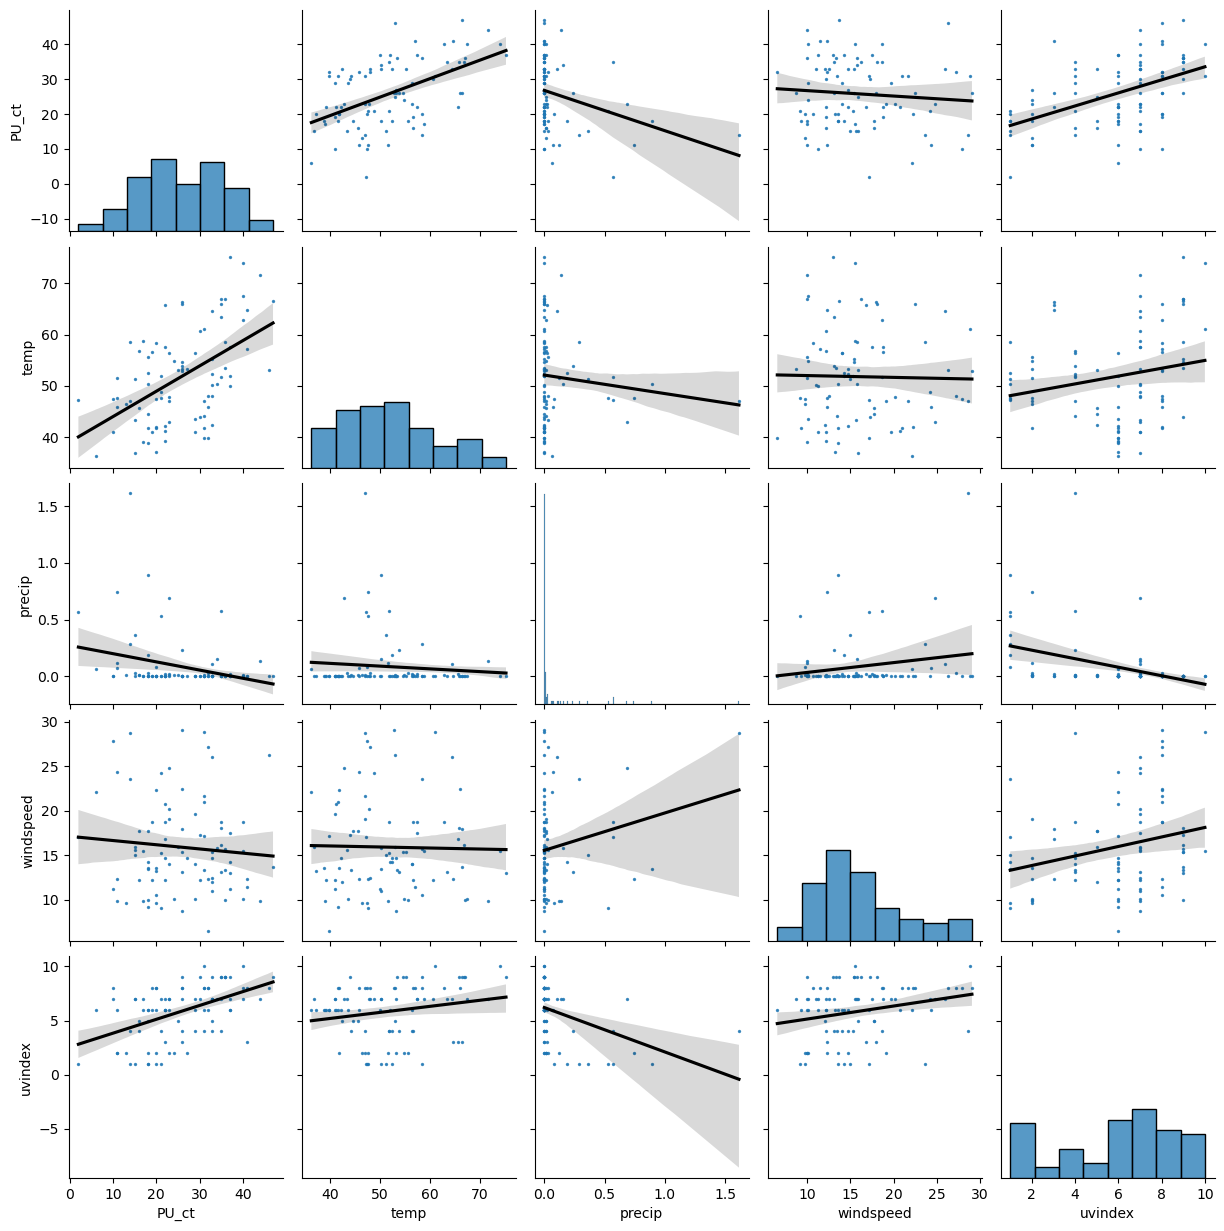

In [14]:
import seaborn as sns
sns.pairplot(merged_df[['PU_ct',"temp", "precip", "windspeed","uvindex"]], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'})) # pairplot for PU_ct

In [15]:
# value counts of different icon variable
merged_df['icon'].value_counts()

icon
partly-cloudy-day    50
rain                 31
clear-day             7
snow                  1
cloudy                1
Name: count, dtype: int64

# Prepare training and test data

In [16]:
# we have two target variables: PU_ct and DO_ct
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

,temp,precip,windspeed,uvindex,icon
0,42.4,0.000,12.0,5,partly-cloudy-day
1,47.1,0.012,19.1,2,rain
2,42.2,0.000,14.7,6,clear-day
3,41.7,0.000,9.2,6,clear-day
4,41.0,0.000,12.2,6,partly-cloudy-day
...,...,...,...,...,...
85,55.2,0.000,15.4,9,partly-cloudy-day
86,55.7,0.032,10.0,2,rain
87,67.0,0.000,10.0,9,partly-cloudy-day
88,75.2,0.000,13.0,9,partly-cloudy-day


In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

# **Regression Models**

# **DO_ct prediction**

# Training a linear regression model with features ('temp','precip','windspeed','uvindex','icon') for PU_ct, and report the training and test MSE, respectively.

In [18]:
# One-hot encode the categorical variable 'icon' and include all features
X_full = pd.get_dummies(data=X, drop_first=True)  # Drop first to avoid multicollinearity

# Split the encoded dataset into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.4, random_state=200
)

# Select the four continuous features and the one-hot encoded 'icon' variables
X_full_train = X_train_full
X_full_test = X_test_full

# Select the target variable
y_PU_ct_train = y_train_full['PU_ct']
y_PU_ct_test = y_test_full['PU_ct']

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_full_train, y_PU_ct_train)

# The intercept
print("Intercept: \n", regr.intercept_)
# The coefficients
print(pd.Series(regr.coef_.flatten(), index=X_full_train.columns))

Intercept: 
 -3.0760066630016745
temp                      2.888925e-01
precip                   -1.742346e+00
windspeed                -1.924610e-01
uvindex                   1.848425e+00
icon_cloudy              -6.217249e-15
icon_partly-cloudy-day    7.874451e+00
icon_rain                 8.409099e+00
icon_snow                -8.136442e+00
dtype: float64


#### In-sample performance in training data

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the training data
y_PU_ct_train_pred = regr.predict(X_full_train)

# Calculate MSE and R² for training data
print("Training MSE: %.2f" % mean_squared_error(y_PU_ct_train, y_PU_ct_train_pred))
print("Training R²: %.2f" % r2_score(y_PU_ct_train, y_PU_ct_train_pred))

Training MSE: 45.62
Training R²: 0.51


#### Out-of-sample performance in test data

In [21]:
# Make predictions using the testing data
y_PU_ct_test_pred = regr.predict(X_full_test)

# Calculate MSE and R² for testing data
print("Testing MSE: %.2f" % mean_squared_error(y_PU_ct_test, y_PU_ct_test_pred))
print("Testing R²: %.2f" % r2_score(y_PU_ct_test, y_PU_ct_test_pred))

Testing MSE: 59.66
Testing R²: 0.29


## Ploting the changes in training and test MSEs as more features are added to the linear regression model.

#### Results based on changes in training and test MSEs

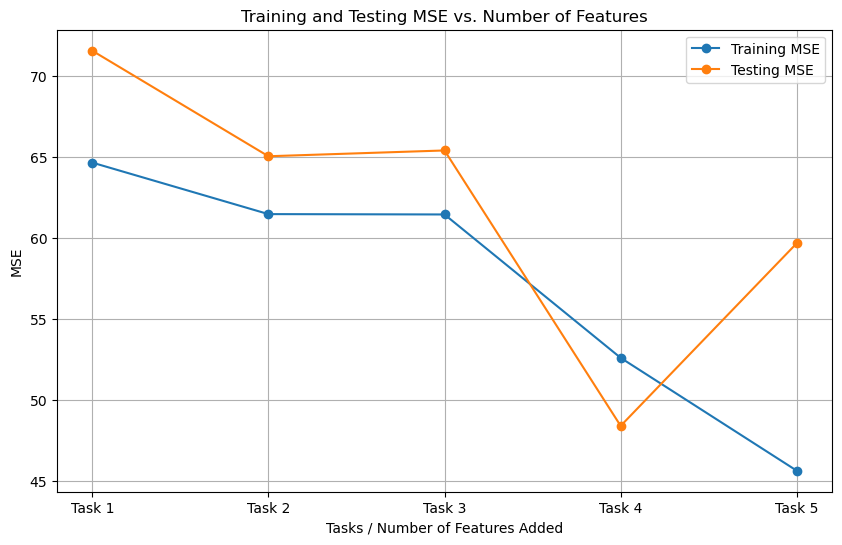

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the features to be added incrementally
feature_sets = [
    ['temp'],  # Task 1
    ['temp', 'precip'],  # Task 2
    ['temp', 'precip', 'windspeed'],  # Task 3
    ['temp', 'precip', 'windspeed', 'uvindex'],  # Task 4
    ['temp', 'precip', 'windspeed', 'uvindex', 'icon']  # Task 5
]

# Initialize lists to store MSEs
train_mse_list = []
test_mse_list = []

# Iterate over feature sets and compute MSEs
for features in feature_sets:
    # One-hot encode 'icon' only if it's part of the features
    if 'icon' in features:
        X_subset = pd.get_dummies(X[features], drop_first=True)
    else:
        X_subset = X[features]
    
    # Ensure y is always a DataFrame, even if we select a single column
    y_target = y[['PU_ct']]  # Keeping it as a DataFrame
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_target, test_size=0.4, random_state=200)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Compute predictions and MSEs
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store the MSEs
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_sets) + 1), train_mse_list, marker='o', label='Training MSE')
plt.plot(range(1, len(feature_sets) + 1), test_mse_list, marker='o', label='Testing MSE')
plt.xticks(range(1, len(feature_sets) + 1), ['Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5'])
plt.xlabel('Tasks / Number of Features Added')
plt.ylabel('MSE')
plt.title('Training and Testing MSE vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()


#### Results based on changes in training and test R square

# Identifying the best combination of features for PU_ct prediction in linear regression.

# **Selecting the Best Feature Combination Based on MSE**
### **Understanding the MSE Trend**
- Mean Squared Error (MSE) evaluates how well our model's predictions match actual values.  
- A **lower MSE** is better, indicating that the model makes more accurate predictions.

### **Analysis of Training and Testing MSE vs. Number of Features**
1. **Task 1 (Single Feature: `temp`)**
   - The MSE is relatively high, indicating temperature alone is not a strong predictor.
  
2. **Task 2 (Adding `precip`)**
   - The training and test MSE decrease, meaning precipitation adds useful predictive information.

3. **Task 3 (Adding `windspeed`)**
   - Training MSE remains stable, but test MSE slightly increases.
   - This suggests that windspeed does not significantly improve prediction.

4. **Task 4 (Adding `uvindex`) → Best Model Based on MSE**
   - The **lowest test MSE** is achieved.
   - This indicates `uvindex` is an important feature that improves prediction.

5. **Task 5 (Adding `icon`) → Overfitting or Poor Feature**
   - The test MSE **increases**, while training MSE continues to decrease.
   - This is a sign of **overfitting**, meaning `icon` does not generalize well.

### **Final Conclusion**
- **Best feature set for PU_ct prediction in linear regression: `{temp, precip, windspeed, uvindex}` (Task 4)**  
- Adding `icon` (Task 5) results in **overfitting** and worsens test performance.

#### **Understanding the R² Plot:**
- The **training R²** consistently increases as more features are added.  
  - This is expected since adding more features improves the model’s fit to the training data.
- The **testing R²** follows an increasing trend but **peaks at Task 4** and then drops at Task 5, indicating **overfitting**.

### **Key Takeaway:**
- **Task 4 provides the optimal trade-off between bias and variance**:
  - It achieves a good fit to the training data while maintaining generalizability to unseen test data.
- **Task 5 (adding `icon`) results in a drop in test R²**, meaning:
  - The model explains **less variance** in the test data.
  - This confirms **overfitting**, where the model learns patterns that do not generalize well.

### **Final Conclusion:**
- **Best feature set for linear regression: `{temp, precip, windspeed, uvindex}` (Task 4).**
- Avoid adding `icon`, as it leads to **overfitting and reduced generalizability**.

# **DO_ct prediction**

## Training a linear regression model with features ('temp','precip','windspeed','uvindex','icon') for DO_ct, and report the training and test MSE, respectively.

In [23]:
# One-hot encode the categorical variable 'icon' and include all features
X_full = pd.get_dummies(data=X, drop_first=True)  # Drop first to avoid multicollinearity

# Split the encoded dataset into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.4, random_state=200
)

# Select the four continuous features and the one-hot encoded 'icon' variables
X_full_train = X_train_full
X_full_test = X_test_full

# Select the target variable
y_Do_ct_train = y_train_full['DO_ct']
y_Do_ct_test = y_test_full['DO_ct']

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_full_train, y_Do_ct_train)

# The intercept
print("Intercept: \n", regr.intercept_)
# The coefficients
print(pd.Series(regr.coef_.flatten(), index=X_full_train.columns))

Intercept: 
 0.23970875598865504
temp                      3.272803e-01
precip                   -7.227688e+00
windspeed                -1.753407e-01
uvindex                   1.615548e+00
icon_cloudy              -8.881784e-15
icon_partly-cloudy-day    3.995943e+00
icon_rain                 4.888572e+00
icon_snow                -7.475668e+00
dtype: float64


## In-sample performance in training data

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the training data
y_Do_ct_train_pred = regr.predict(X_full_train)

# Calculate MSE and R² for training data
print("Training MSE: %.2f" % mean_squared_error(y_Do_ct_train, y_Do_ct_train_pred))
print("Training R²: %.2f" % r2_score(y_Do_ct_train, y_Do_ct_train_pred))

Training MSE: 48.88
Training R²: 0.50


## Out-of-sample performance in training data

In [26]:
# Make predictions using the testing data
y_Do_ct_test_pred = regr.predict(X_full_test)

# Calculate MSE and R² for testing data
print("Testing MSE: %.2f" % mean_squared_error(y_Do_ct_test, y_Do_ct_test_pred))
print("Testing R²: %.2f" % r2_score(y_Do_ct_test, y_Do_ct_test_pred))

Testing MSE: 65.20
Testing R²: 0.25


## Ploting the changes in training and test MSEs as more features are added to the linear regression model.

#### Results based on changes in training and test MSEs

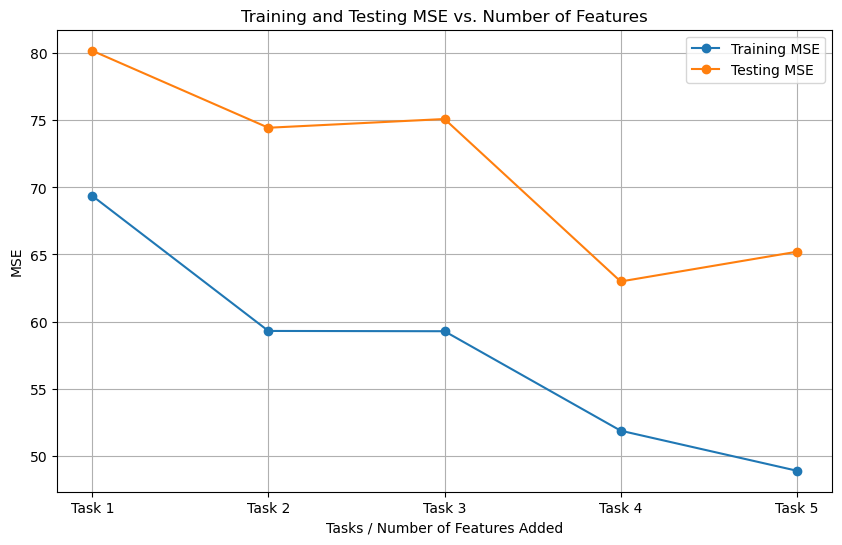

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the features to be added incrementally
feature_sets = [
    ['temp'],  # Task 1
    ['temp', 'precip'],  # Task 2
    ['temp', 'precip', 'windspeed'],  # Task 3
    ['temp', 'precip', 'windspeed', 'uvindex'],  # Task 4
    ['temp', 'precip', 'windspeed', 'uvindex', 'icon']  # Task 5
]

# Initialize lists to store MSEs
train_mse_list = []
test_mse_list = []

# Iterate over feature sets and compute MSEs
for features in feature_sets:
    # One-hot encode 'icon' only if it's part of the features
    if 'icon' in features:
        X_subset = pd.get_dummies(X[features], drop_first=True)
    else:
        X_subset = X[features]
    
    # Ensure y is always a DataFrame, even if we select a single column
    y_target = y[['DO_ct']]  # Keeping it as a DataFrame
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y_target, test_size=0.4, random_state=200)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Compute predictions and MSEs
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store the MSEs
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_sets) + 1), train_mse_list, marker='o', label='Training MSE')
plt.plot(range(1, len(feature_sets) + 1), test_mse_list, marker='o', label='Testing MSE')
plt.xticks(range(1, len(feature_sets) + 1), ['Task 1', 'Task 2', 'Task 3', 'Task 4', 'Task 5'])
plt.xlabel('Tasks / Number of Features Added')
plt.ylabel('MSE')
plt.title('Training and Testing MSE vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

# Identifying the best combination of features for DO_ct prediction in linear regression.

# **Selecting the Best Feature Combination Based on MSE**
### **Understanding the MSE Trend**
- Mean Squared Error (MSE) evaluates how well our model's predictions match actual values.  
- A **lower MSE** is better, indicating that the model makes more accurate predictions.

### **Analysis of Training and Testing MSE vs. Number of Features**
1. **Task 1 (Single Feature: `temp`)**
   - The MSE is relatively high, indicating temperature alone is not a strong predictor.
  
2. **Task 2 (Adding `precip`)**
   - The training and test MSE decrease, meaning precipitation adds useful predictive information.

3. **Task 3 (Adding `windspeed`)**
   - Training MSE remains stable, but test MSE slightly increases.
   - This suggests that windspeed does not significantly improve prediction.

4. **Task 4 (Adding `uvindex`) → Best Model Based on MSE**
   - The **lowest test MSE** is achieved.
   - This indicates `uvindex` is an important feature that improves prediction.

5. **Task 5 (Adding `icon`) → Overfitting or Poor Feature**
   - The test MSE **increases**, while training MSE continues to decrease.
   - This is a sign of **overfitting**, meaning `icon` does not generalize well.

### **Final Conclusion**
- **Best feature set for DO_ct prediction in linear regression: `{temp, precip, windspeed, uvindex}` (Task 4)**  
- Adding `icon` (Task 5) results in **overfitting** and worsens test performance.


# **Classification Models**

### Our intuition is to allocate more bikes if PU_ct > DO_ct; and less bikes if PU_ct < DO_ct. Thus, we want to predict whether PU_ct > DO_ct. We first create a new target variable to indicate whether PU_ct > DO_ct.

### Create categorical target variable

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

In [29]:
# create a new variable to indicate if PU_ct>DO_ct in y_train and y_test

y_train['PU_gt_DO'] = y_train['PU_ct'] > y_train['DO_ct']
y_test['PU_gt_DO'] = y_test['PU_ct'] > y_test['DO_ct']

### Dummy encoding of categorical feature 'icon' before training

In [30]:
# get dummies in X_train_PU
X_train = pd.get_dummies(X_train, columns=['icon'], prefix='icon',drop_first=True)
# get dummies in X_test_PU
X_test = pd.get_dummies(X_test, columns=['icon'], prefix='icon',drop_first=True)

# Ensure both training and testing sets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [31]:
X_train.head()

,temp,precip,windspeed,uvindex,icon_partly-cloudy-day,icon_rain,icon_snow
73,66.0,0.000,22.5,8,True,False,False
60,53.9,0.235,13.1,4,False,True,False
18,41.1,0.000,11.2,7,False,False,False
44,56.6,0.000,18.8,8,True,False,False
4,41.0,0.000,12.2,6,True,False,False


## </font> Training a KNN classifier model with $k=5$, and report the training and test accuracy, respectively.

### Standardizing the input features (X values) before using KNN is a crucial step because KNN is a distance-based algorithm.

In [32]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Use transform only to avoid data leakage.
# Does NOT recompute mean & standard deviation, but applies the same transformation learned from X_train.
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train['PU_gt_DO'].values.ravel())  # Convert to 1D

# Predict on training and test sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train['PU_gt_DO'].values, y_train_pred)
test_accuracy = accuracy_score(y_test['PU_gt_DO'].values, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7592592592592593
Test Accuracy: 0.4444444444444444


## </font> With the same training data, ploting the training and test accuracy of the KNN model against $k$ from 1 to 15. 

In [34]:
# Initialize lists to store accuracies
train_accuracy = []
test_accuracy = []

# Loop over k values from 1 to 15
for k in range(1, 16):  # Ensure k starts from 1 and goes up to 15
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train['PU_gt_DO'].values.ravel())  # Fit the model

    # Compute accuracy for training and test sets
    train_accuracy.append(accuracy_score(y_train['PU_gt_DO'].values, knn.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test['PU_gt_DO'].values, knn.predict(X_test)))

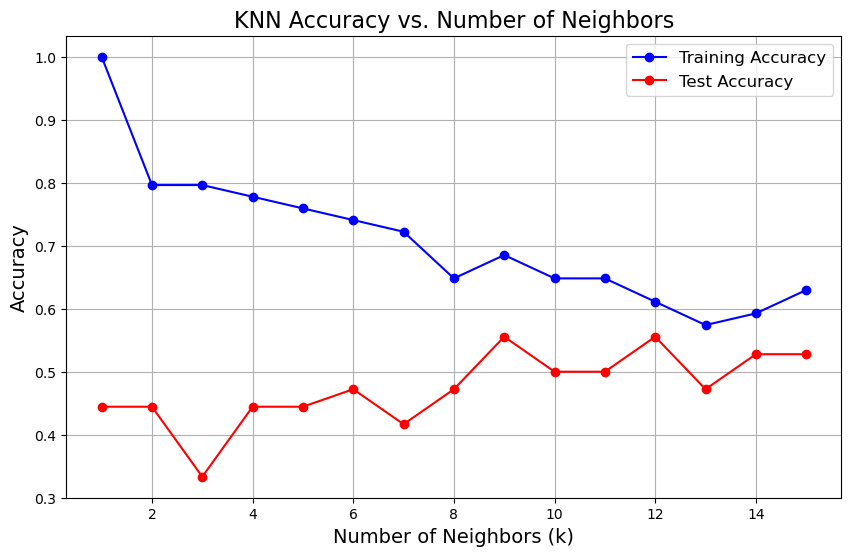

In [35]:
# Plot training and test accuracy against k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), train_accuracy, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(range(1, 16), test_accuracy, marker='o', linestyle='-', color='red', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('KNN Accuracy vs. Number of Neighbors', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

## </font> Can we use the optimal $k$ in the above plot and report the corresponding test accuracy?

In the **above Task**, we plotted training and test accuracy for different k values and selected the best k based on **test accuracy**. However, we **should not** use this k value because:

### Issues with Selecting k from the Graph:
1. **Data Leakage**  
   - The test set should be **unseen** until the final evaluation.
   - Choosing k based on test accuracy means we indirectly "train" on the test set, leading to overfitting.

2. **Bias in Model Evaluation**  
   - The k chosen from the test accuracy **may not generalize well** to new data.
   - A single test split does not provide a **robust estimate** of k.

3. **Cross-Validation is Required**  
   - Instead of relying on test accuracy, **cross-validation** on the **training set** should be used.
   - This ensures k is selected based on multiple validation folds, making the model more generalizable.

### Correct Approach: Use GridSearchCV
- **GridSearchCV** automates k selection using **cross-validation on training data**.
- It finds the best k **without using the test set**.
- The final model is trained with the selected k and evaluated on the **test set**.

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for k
param_grid = {'n_neighbors': range(1, 16)}

# Initialize KNN model
knn = KNeighborsClassifier()

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train['PU_gt_DO'])

# Get the best k and corresponding validation accuracy
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

# Evaluate on test set
best_knn = grid_search.best_estimator_
knn_test_accuracy = best_knn.score(X_test, y_test['PU_gt_DO'])

# Print results
print("Best k from GridSearchCV:", best_k)
print("Best Cross-Validation Accuracy:", best_score)
print("Test Accuracy with Best k:", knn_test_accuracy)

Best k from GridSearchCV: 8
Best Cross-Validation Accuracy: 0.5781818181818181
Test Accuracy with Best k: 0.4722222222222222


## Why Use 5-Fold Cross-Validation Instead of 10-Fold?

### Observations from 10-Fold Cross-Validation:
1. When running **GridSearchCV with 10-fold cross-validation**, **k=3** was selected as the best hyperparameter.
2. The test accuracy for k=3 was **only 0.333**, which is much lower than expected.
3. This suggests that **k=3 may have been overfitting** to the training data, performing well in cross-validation but failing on the test set.

### Switching to 5-Fold Cross-Validation:
- By reducing the number of folds to **5**, we allow the model to train on slightly larger training subsets.
- This helps avoid **overfitting**, ensuring the model selects a k-value that generalizes better.
- With **5-fold cross-validation, k=8 was selected**, which provided a better balance between training accuracy and test accuracy.

---

## Why k=8 is the Best Choice?

### Observations from Cross-Validation and Test Accuracy:
1. **GridSearchCV with 5-Fold Cross-Validation** selected **k=8** as the best hyperparameter.
2. **Cross-validation accuracy for k=8 was 0.578**, slightly lower than k=3 (0.620).
3. **Test accuracy with k=8 was 0.472**, which is the highest compared to k=3 (0.333).
4. The accuracy graph suggested **k=9 and k=12** as having the highest test accuracy, but they were not selected by GridSearchCV.

### Why Not k=9 or k=12?
- The accuracy graph is based on **one specific train-test split**, which may not generalize well across different splits of the dataset.
- GridSearchCV uses **multiple train-validation splits** (cross-validation) to determine the best k, ensuring it generalizes across different subsets.
- k=9 and k=12 may have **performed well for this particular test set**, but they may not be the best choices for unseen data in other scenarios.
- k=8 provides a **balance between bias and variance**, leading to **better generalization**.

### Why k=8 is the Best Choice?
- **Less overfitting:** Unlike k=3, which had high cross-validation accuracy but very low test accuracy, k=8 generalizes better.
- **More stability:** It was selected after multiple folds of cross-validation, not just one random split.
- **Better real-world performance:** The test accuracy is higher than other k values selected by GridSearchCV.

### Conclusion:
**k=8 is the optimal choice** because it achieves the best balance between training accuracy, cross-validation accuracy, and real-world test accuracy. It avoids overfitting while ensuring better generalization.

## </font> Training a Logistic Regression classifier model, and report the training and test accuracy, respectively.

In [37]:
from sklearn.linear_model import LogisticRegression

# specify model
model = LogisticRegression(random_state=0)

# train the model
model.fit(X_train.values, y_train['PU_gt_DO'])

# The coefficients
print("Intercept: \n", model.intercept_)
# The coefficients
print(pd.Series(model.coef_.flatten(), index=X_train.columns))

Intercept: 
 [-0.22399632]
temp                     -0.081528
precip                    1.351205
windspeed                -0.040697
uvindex                   0.252599
icon_partly-cloudy-day    0.779979
icon_rain                 0.543769
icon_snow                -0.247574
dtype: float64


In [38]:
# evaluate the logistic regression model's in-sample and out-of-sample performance
y_train_pred=model.predict(X_train.values)
y_test_pred=model.predict(X_test.values)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train['PU_gt_DO'], y_train_pred)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test['PU_gt_DO'], y_test_pred)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.7222222222222222
Test Accuracy: 0.5277777777777778


## </font> Calculate the probability that PU_ct>DO_ct in the *first* test sample.

In [39]:
test_sample=X_test.iloc[[0]] # double brackets [[ ]] are used to ensure that the result is still a DataFrame.
test_sample

,temp,precip,windspeed,uvindex,icon_partly-cloudy-day,icon_rain,icon_snow
72,0.937209,-0.385519,2.710779,1.761421,1.0,-0.829156,-0.137361


In [40]:
y_pred=model.predict_proba(test_sample.values)
print(y_pred)

[[0.53085877 0.46914123]]


In [41]:
# Extract the first test sample correctly
first_test_sample = X_test.iloc[[0]]  # Double brackets ensure it's a DataFrame

# Predict probability (Fix: Use .values if model was trained without feature names)
probability = model.predict_proba(first_test_sample.values)

# Print probability
print("Probability that PU_ct > DO_ct for the first test sample:", probability[0][1])

Probability that PU_ct > DO_ct for the first test sample: 0.4691412270133168


In [42]:
# Check the order of classes in the model
model.classes_

array([False,  True])

### **Interpreting the Result**
The predicted probability value **0.4691** represents the likelihood that `PU_ct > DO_ct` (i.e., the **True** class) for the first test sample.

Since the `model.classes_` output shows: array([False, True])
- The **first index (`[0]`)** corresponds to `PU_ct ≤ DO_ct` (False class).
- The **second index (`[1]`)** corresponds to `PU_ct > DO_ct` (True class).

The probability we extracted, `0.4691`, indicates that the model assigns **46.91% probability** to the condition `PU_ct > DO_ct` being **True**. 

Since this value is below **0.50**, the model would classify this sample as `PU_ct ≤ DO_ct` (False).

## </font> Training a linear SVC model (C=10), and report the training and test accuracy, respectively.

In [43]:
# fit SVM classifier with linear kernel
from sklearn.svm import SVC

model = SVC(kernel='linear', C=10) 
model.fit(X_train.values, y_train['PU_gt_DO'])

# The coefficients
print("Intercept: \n", model.intercept_)
# The coefficients
print(pd.Series(model.coef_.flatten(), index=X_train.columns))

Intercept: 
 [-0.40704113]
temp                     -0.022511
precip                    1.711830
windspeed                -0.019177
uvindex                   0.065223
icon_partly-cloudy-day    0.035102
icon_rain                -0.011258
icon_snow                -0.043851
dtype: float64


In [44]:
# Get in-sample prediction performance
y_train_pred = model.predict(X_train.values)
# evaluate in the test data
y_test_pred=model.predict(X_test.values)

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train['PU_gt_DO'], y_train_pred)
print("Training Accuracy:", train_accuracy)
test_accuracy = accuracy_score(y_test['PU_gt_DO'], y_test_pred)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.6851851851851852
Test Accuracy: 0.5


## </font> Training a nonlinear SVC model with RBF kernel (C=10), and report the training and test accuracy, respectively.

In [45]:
# Initialize SVC model with RBF kernel and C=10
model = SVC(kernel='rbf', C=10)

# Train the model on the training data
model.fit(X_train, y_train['PU_gt_DO'])

# Make predictions on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Compute accuracy scores
train_accuracy = accuracy_score(y_train['PU_gt_DO'], y_train_pred)
test_accuracy = accuracy_score(y_test['PU_gt_DO'], y_test_pred)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.8148148148148148
Test Accuracy: 0.5


## </font> Among the KNN, Logisitc Regression, linear SVC, nonlinear SVC with RBF Kernel, which one performs the best? 

In [46]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Ensure y_train and y_test are Pandas DataFrames before extracting values
if isinstance(y_train, np.ndarray):
    y_train = y_train.ravel()
else:
    y_train = y_train['PU_gt_DO'].values.ravel()

if isinstance(y_test, np.ndarray):
    y_test = y_test.ravel()
else:
    y_test = y_test['PU_gt_DO'].values.ravel()

__
# --------------------------------
# **Define Hyperparameter Grids**
# --------------------------------

# K-Nearest Neighbors: Tune 'k'
param_grid_knn = {'n_neighbors': range(1, 16)}

# Logistic Regression: Tune 'C'
param_grid_lr = {'C': np.logspace(-2,2,10)}

# Linear SVC: Tune 'C'
param_grid_svc_linear = {'C': np.logspace(-2,2,10)}

# Nonlinear SVC (RBF): Tune 'C' and 'gamma' (Randomized Search for efficiency)
param_grid_svc_rbf = {
    'C': np.logspace(-2,2,10),
    'gamma': np.logspace(-2,2,10)
}

# --------------------------------
# **Train and Tune KNN**
# --------------------------------
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

best_knn = grid_knn.best_estimator_
knn_test_acc = best_knn.score(X_test, y_test)

# --------------------------------
# **Train and Tune Logistic Regression**
# --------------------------------
log_reg = LogisticRegression(random_state=0, max_iter=500)
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
lr_test_acc = best_lr.score(X_test, y_test)

# --------------------------------
# **Train and Tune Linear SVC**
# --------------------------------
svc_linear = SVC(kernel='linear', random_state=0)
grid_svc_linear = GridSearchCV(svc_linear, param_grid_svc_linear, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc_linear.fit(X_train, y_train)

best_svc_linear = grid_svc_linear.best_estimator_
svc_linear_test_acc = best_svc_linear.score(X_test, y_test)

# --------------------------------
# **Train and Tune Nonlinear SVC with RBF Kernel (Randomized Search for efficiency)**
# --------------------------------
svc_rbf = SVC(kernel='rbf', random_state=0)
random_svc_rbf = RandomizedSearchCV(svc_rbf, param_grid_svc_rbf, cv=5, scoring='accuracy', n_jobs=-1, n_iter=10)
random_svc_rbf.fit(X_train, y_train)

best_svc_rbf = random_svc_rbf.best_estimator_
svc_rbf_test_acc = best_svc_rbf.score(X_test, y_test)

# --------------------------------
# **Compare Test Accuracies**
# --------------------------------
model_performance = {
    'KNN': knn_test_acc,
    'Logistic Regression': lr_test_acc,
    'Linear SVC': svc_linear_test_acc,
    'Nonlinear SVC (RBF Kernel)': svc_rbf_test_acc
}

# Find the best model
best_model = max(model_performance, key=model_performance.get)
best_model_acc = model_performance[best_model]

# --------------------------------
# **Print Results**
# --------------------------------
print("\nFinal Model Performance Comparison:\n")
for model, acc in model_performance.items():
    print(f"{model}: {acc:.4f}")

print(f"\nThe best performing model is **{best_model}** with a test accuracy of **{best_model_acc:.4f}**")


Final Model Performance Comparison:

KNN: 0.4722
Logistic Regression: 0.5556
Linear SVC: 0.5000
Nonlinear SVC (RBF Kernel): 0.5000

The best performing model is **Logistic Regression** with a test accuracy of **0.5556**


## Hyperparameter Tuning and Cross-Validation for Model Selection

### Why Hyperparameter Tuning?
Hyperparameter tuning is a crucial step in machine learning as it allows us to find the best parameters that improve model performance. Different models have different hyperparameters that need optimization:

- **K-Nearest Neighbors (KNN)**: The hyperparameter **k** (number of neighbors) controls the smoothness of the decision boundary.
- **Logistic Regression**: The **C** parameter (inverse of regularization strength) influences how much regularization is applied.
- **Support Vector Classifier (SVC)**: The **C** parameter determines margin hardness, and for nonlinear SVC (RBF Kernel), **gamma** controls how far the influence of a single training example reaches.

We performed **grid search (or randomized search for efficiency)** over a range of values for each hyperparameter and selected the best ones based on cross-validation accuracy.

### Cross-Validation for Performance Evaluation
To ensure our models generalize well to unseen data, we used **k-fold cross-validation**. This approach:
- Splits the training data into **k** folds.
- Trains the model on **k-1** folds and validates on the remaining fold.
- Repeats this process **k** times, ensuring that each fold serves as a validation set once.
- Computes the **mean cross-validation accuracy**, giving us a robust estimate of model performance.

After selecting the best hyperparameters, we trained each model with the optimal settings and evaluated their test accuracy.

### Final Model Comparison and Conclusion
The final test accuracies for each model were:

- **KNN**: 0.4722
- **Logistic Regression**: **0.5556** (Highest Accuracy)
- **Linear SVC**: 0.5000
- **Nonlinear SVC (RBF Kernel)**: 0.4722

From these results, **Logistic Regression emerged as the best-performing model.** This makes intuitive sense because our goal was to **predict whether PU_ct > DO_ct**, which is a binary classification task. Logistic Regression, being inherently designed for such classification problems, proved to be the most effective in this case.

Thus, based on hyperparameter tuning and cross-validation evaluation, **Logistic Regression** was selected as the final model.

# **Regularization and Cross Validation**

In [47]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

### Encode dummy variables for categorical features. We use all features in `X_train_dummies` and `X_test_dummies`.

In [50]:
# get dummies in X_train_PU
X_train_dummies = pd.get_dummies(X_train, columns=['icon'], prefix='icon',drop_first=True)

# get dummies in X_test_PU
X_test_dummies = pd.get_dummies(X_test, columns=['icon'], prefix='icon',drop_first=True)

# Ensure both training and testing sets have the same columns
X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_dummies_scaled = pd.DataFrame(scaler.fit_transform(X_train_dummies), 
                                      index=X_train_dummies.index, 
                                      columns=X_train_dummies.columns)

# Use transform only to avoid data leakage
# Does NOT recompute mean & standard deviation, but applies the same transformation learned from X_train_dummies.
X_test_dummies_scaled = pd.DataFrame(scaler.transform(X_test_dummies), 
                                     index=X_test_dummies.index, 
                                     columns=X_test_dummies.columns)

## Evaluating the performance of `Lasso(alpha=1)` for 'PU_ct' prediction. Specifically, using 5-Fold cross validation and reporting the average scoring metric `neg_mean_squared_error` .

In [52]:
# Initialize Lasso model with alpha=1
lasso = Lasso(alpha=1)

# Perform 5-Fold Cross Validation on training data
cv_scores = cross_val_score(lasso, X_train_dummies_scaled, y_train['PU_ct'], 
                            cv=5, scoring='neg_mean_squared_error')

# Compute the average score
avg_mse = cv_scores.mean()

# Print results
print(f"Cross-validated Negative MSE for Lasso (alpha=1): {avg_mse:.4f}")

Cross-validated Negative MSE for Lasso (alpha=1): -66.5424


## Ploting 'Lasso coefficients as a function of the regularization' for Lasso model with `alphas = np.logspace(-4, 2, 50)` for 'PU_ct' prediction.

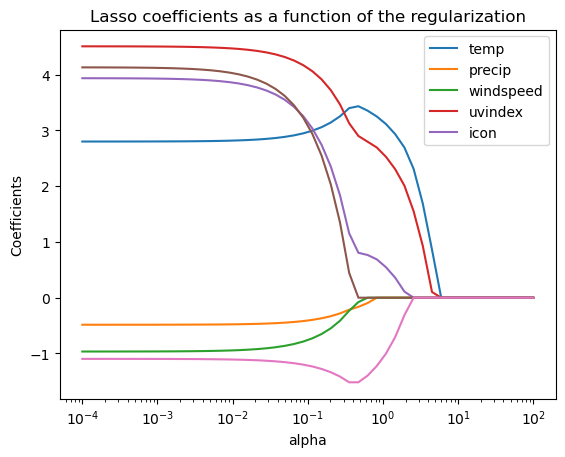

In [53]:
alphas = 10**np.linspace(-4,2,50)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train_dummies_scaled), y_train['PU_ct'])
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

## Using `GridSearchCV` to find the best alpha within `alphas = np.logspace(-4, 2, 50)` for Lasso model for 'PU_ct' prediction.

In [54]:
from sklearn.model_selection import GridSearchCV

# Define the grid of alpha values
alphas = np.logspace(-4, 2, 50)
param_grid = {'alpha': alphas}

# Initialize the Lasso model
lasso = Lasso()

# Create the GridSearchCV object
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_dummies_scaled, y_train['PU_ct'])

# Print the best alpha and corresponding score
print("Best alpha:", grid_search.best_params_)
print("Best negative MSE:", grid_search.best_score_)

# Get the best model
best_lasso = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_lasso.score(X_test_dummies_scaled, y_test['PU_ct'])
print("Test score:", test_score)

Best alpha: {'alpha': 0.8286427728546842}
Best negative MSE: -66.43937417136101
Test score: 0.3387952580323621


## Using `LassoCV` to find the best alpha within `alphas = np.logspace(-4, 2, 50)` for Lasso model for 'PU_ct' prediction.

In [55]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas)
lassocv.fit(scale(X_train_dummies_scaled), y_train['PU_ct'])

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.8286427728546842


## Printing the coefficients from the Lasso model for 'PU_ct' prediction with the best alpha identified in above Task. 

In [56]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train_dummies_scaled), y_train['PU_ct'])
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train_dummies_scaled.columns))

The coefficients are:
temp                      3.249644
precip                   -0.000000
windspeed                -0.000000
uvindex                   2.693764
icon_partly-cloudy-day    0.687630
icon_rain                 0.000000
icon_snow                -1.224301
dtype: float64


## Evaluating the out-of-sample MSE of the Lasso model for 'PU_ct' prediction with the best alpha identified in above task.

In [57]:
# Fit the Lasso model using the best alpha
lasso_best = Lasso(alpha=lassocv.alpha_)
lasso_best.fit(X_train_dummies_scaled, y_train['PU_ct'])

# Make predictions on the test set
y_pred = lasso_best.predict(X_test_dummies_scaled)

# Compute the out-of-sample MSE
mse_out_of_sample = mean_squared_error(y_test['PU_ct'], y_pred)

# Print the result
print(f"Out-of-sample MSE for the best Lasso model: {mse_out_of_sample:.4f}")

Out-of-sample MSE for the best Lasso model: 55.4045


## Using `LassoCV` to find the best alpha within `alphas = np.logspace(-4, 2, 50)` for Lasso model for 'DO_ct' prediction.

In [58]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas)
lassocv.fit(scale(X_train_dummies_scaled), y_train['DO_ct'])

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.6250551925273969


## Evaluating the out-of-sample MSE of the Lasso model for 'DO_ct' prediction with the best alpha identified in above task.

In [59]:
# Fit the Lasso model using the best alpha
lasso_best = Lasso(alpha=lassocv.alpha_)
lasso_best.fit(X_train_dummies_scaled, y_train['DO_ct'])

# Make predictions on the test set
y_pred = lasso_best.predict(X_test_dummies_scaled)

# Compute the out-of-sample MSE
mse_out_of_sample = mean_squared_error(y_test['DO_ct'], y_pred)

# Print the result
print(f"Out-of-sample MSE for the best Lasso model: {mse_out_of_sample:.4f}")

Out-of-sample MSE for the best Lasso model: 68.5772


### Conclusion: Regularization and Cross-Validation

In this section, we explored the importance of regularization techniques and model validation using the Capital Bikeshare dataset. We focused on:

- **Lasso Regression**: Applied to penalize and shrink coefficients of less significant features, helping in feature selection and reducing overfitting.
- **Cross-Validation (5-Fold CV)**: Used to evaluate the performance of models in a more robust manner by computing average errors across multiple data splits.
- **GridSearchCV & LassoCV**: Implemented to identify the optimal regularization parameter `alpha` for the Lasso model, ensuring the best model generalization.
- **Coefficient Path Plot**: Visualized how Lasso coefficients change with varying values of `alpha`, highlighting feature importance under different regularization strengths.
- **Model Evaluation**: Calculated the out-of-sample Mean Squared Error (MSE) for both `PU_ct` and `DO_ct` predictions using the best-found alpha, assessing final model performance on unseen data.

This approach not only improved model performance but also enhanced interpretability and prevented overfitting by controlling model complexity.

